Read raw data with zone(from kmeans clustering result)
===

In [46]:
import time
import os
import numpy as np
import seaborn as sns
import matplotlib
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
from PIL import Image
from keras.utils import np_utils#
from numpy import genfromtxt
#from learning_model import *
from sklearn.metrics import mean_squared_error
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
%matplotlib inline

In [121]:
train_part_test = np.genfromtxt('./zone_result/set5_noleft_cluster.csv', delimiter=',')
pixel_pos = np.genfromtxt('./src/pixel_pos.csv', delimiter=',')
print (train_part_test)
#print (pixel_pos[1:,:])

[[  49.294      23.455      38.        -83.081818   14.      ]
 [  49.552      14.911      38.        -63.681949    6.      ]
 [  49.5775     20.602      38.        -59.940728    6.      ]
 [  49.6105     12.538      38.        -73.216333    6.      ]
 [  49.645      18.5845     38.        -60.365192    6.      ]
 [  49.834      16.6825     38.        -68.831439    6.      ]
 [  51.91       23.7445     38.        -81.917857   14.      ]
 [  52.066      20.539      38.        -88.655769   14.      ]
 [  52.099      12.475      38.        -87.857241    4.      ]
 [  52.15       14.4895     38.        -95.7721     14.      ]
 [  52.204      16.6225     38.        -90.965169   14.      ]
 [  52.252      18.5185     38.        -82.041456   14.      ]
 [  53.863      16.5805     38.        -68.105485    6.      ]
 [  53.9305     14.563      38.        -70.269406    6.      ]
 [  53.962      20.491      38.        -69.814386    6.      ]
 [  53.989      12.19       38.        -72.019807    6.

PCI training
===

[39. 41. 41. 39. 40. 38. 41. 38. 40. 41. 39. 41. 41. 41. 38. 42. 40. 40.]
18
n_accuracy_pci== 15
len(pci_pred)== 18
pci accuracy:  0.8333333333333334


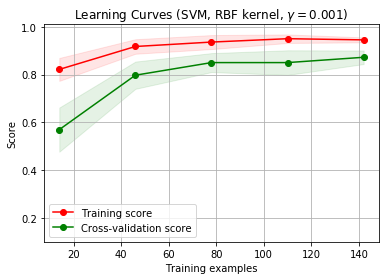

In [122]:
X = train_part_test[:,0:2]
y = train_part_test[:,2]
#y = np_utils.to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
#print(X_train)
modelClassifier = KNeighborsClassifier(n_neighbors=3)
#modelClassifier = DecisionTreeClassifier()
#modelClassifier = MLPClassifier(solver='adam', alpha=1e-5,
#                                hidden_layer_sizes=(100, 1), random_state=1)
#
'''
modelClassifier = Sequential()
modelClassifier.add(Dense(128, activation='relu', input_dim = 2))
modelClassifier.add(Dense(128, activation='relu'))
modelClassifier.add(Dense(128, activation='relu'))
modelClassifier.add(Dense(128, activation='relu'))
modelClassifier.add(Dense(1,activation='relu'))
modelClassifier.compile(loss='mean_squared_error', optimizer='adam')
modelClassifier.fit(X_train, y_train, nb_epoch=nb_epoch, batch_size=16, shuffle=True)
'''
modelClassifier.fit(X_train, y_train)
y_pred = modelClassifier.predict(X_test)
print(y_pred)
print(len(y_pred))
#print(y_test)
#print(len(y_test))
n_accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]: 
        n_accuracy = n_accuracy+1
print ("n_accuracy_pci==",n_accuracy)
print ("len(pci_pred)==",len(y_pred))
acc = n_accuracy/(len(y_pred))
print('pci accuracy: ',acc )
plot_learning_curve(modelClassifier, title, X, y, ylim=(0.1, 1.01),cv=cv, n_jobs=4)
plt.show()

Predict pci and plot pci map
===

In [123]:
def convert_location_data(x, y) :
    '''
    lng = a * x1 - b * y2 + c 
    lat = a * x2 + b * y1 + d

    NEMO -> indoor position value
    (840, -351) -> (96.824, 0)
    (923, -179) -> (107.068, 15.874)
    '''
    a = 0.1185
    b = -0.003
    c = -1.81
    d = 39.842
    
    lng = a * x - b * y * (-1) + c - 4
    lat = a * y * (-1) + b * x + d - 0.5
    
    
    return lng, lat

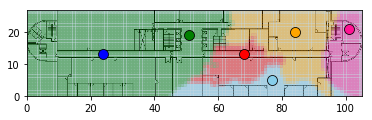

In [124]:
map_size = [105, 27]
x_resolution = map_size[0]
y_resolution = map_size[1]
output = modelClassifier.predict(pixel_pos[1:,:])
#print(output)
#np.savetxt('output.csv', output, delimiter=',', fmt='%f')
pci = []
pci_input =  [37, 38, 39, 40, 41, 42, 120, 151, 154, 1, 62]
pci_config = np.array(pci_input)
f = open('./result_pci/pci_result.csv', 'w') #write the pci result into file
f.write('x,y,pci,\n')
#z = np.reshape(output, (y_resolution, x_resolution))
#z[:] = map(list,zip(*z[::-1]))
#z = np.genfromtxt('z.csv', delimiter=',')
#z_pred = np.hstack((xy, pci_map_pred))
#pci_pred = output.reshape(27,105)
z = np.reshape(output, (y_resolution, x_resolution))
#np.savetxt('z.csv', z, delimiter=',', fmt='%f')
for j in range(y_resolution):
        for i in range(x_resolution) : 
            pci = z[j][i]
            if pci == 37 :#37
                #pci_real = pci_config[0] 
                plt.plot(round(i), round(j), color='blue', marker = 's', markersize=5, alpha=.1)
            elif pci == 38 :#38
                #pci_real = pci_config[1]
                plt.plot(round(i), round(j), color='green', marker = 's', markersize=5, alpha=.1 )
            elif pci == 39 :#39
                #pci_real = pci_config[2]
                plt.plot(round(i), round(j), color='red', marker = 's', markersize=5, alpha=.1 )
            elif pci == 40:#40
                #pci_real = pci_config[3]
                plt.plot(round(i), round(j), color='skyblue', marker = 's', markersize=5, alpha=.1)
            elif pci == 41:#41
                #pci_real = pci_config[4]
                plt.plot(round(i), round(j), color='orange', marker = 's', markersize=5, alpha=.1)
            elif pci == 42:#42
                #pci_real = pci_config[5]
                plt.plot(round(i), round(j), color='deeppink', marker = 's', markersize=5, alpha=.1)
            elif pci == 120:#120
                #pci_real = pci_config[6]
                plt.plot(round(i), round(j), color='yellow', marker = 's', markersize=5, alpha=.1)
            elif pci == 151:#151
                #pci_real = pci_config[7]
                plt.plot(round(i), round(j), color='yellow', marker = 's', markersize=5, alpha=.1)
            elif pci == 154:#154
                #pci_real = pci_config[8]
                plt.plot(round(i), round(j), color='yellow', marker = 's', markersize=5, alpha=.1)
            else :                 
                pci_real = -1
                plt.plot(round(i), round(j), color='white', marker = 's', markersize=5, alpha=.1 )
            result = str(i) + ',' + str(j) + ',' + str(pci) +',' + '\n'
            f.write(result)  # python will convert \n to os.linesep

f.close()  # you can omit in most cases as the destructor will call it
img = plt.imread("./pic/51_5F-3.png")
plt.imshow(img, zorder=0, extent=[0, map_size[0], 0, map_size[1]])
x, y = convert_location_data (260,215) #37
plt.plot(round(abs(x)), round(abs(y)), color='blue', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)

#SC1 (199, 151)
#x, y = convert_location_data (199, 868)
x, y = convert_location_data (480, 158) #38
plt.plot(round(abs(x)), round(abs(y)), color='green', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
    
x, y = convert_location_data (630, 210) #39
plt.plot(round(abs(x)), round(abs(y)), color='red', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
#plt.plot(round(abs(x)), round(abs(y)), color='purple', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
    
x, y = convert_location_data (710, 275) #40
plt.plot(round(abs(x)), round(abs(y)), color='skyblue', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
    
x, y = convert_location_data (765, 145) #41
plt.plot(round(abs(x)), round(abs(y)), color='orange', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
#plt.plot(round(abs(x)), round(abs(y)), color='red', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)

x, y = convert_location_data (908, 130) #42
plt.plot(round(abs(x)), round(abs(y)), color='deeppink', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
plt.savefig('test', dpi=200)

Generate all points with pci and zone
===

In [125]:
pci_result_zone = np.genfromtxt('./result_pci/pci_result.csv', delimiter=',')
#print (pci_result_zone)
for i in range(len(pci_result_zone)):
    pci_result_zone[:,3] = "0" 
print (pci_result_zone)
pci_result_zone_pd = pd.DataFrame(pci_result_zone,columns=['x','y','pci','zone'])
pci_result_zone_pd = pci_result_zone_pd.drop(pci_result_zone_pd.index[0])
pci_result_zone_pd.to_csv('./result_pci/pci_result_zone_pd.csv')
#print (pci_result_zone_pd)
train_part_test[:,0] = np.around(train_part_test[:,0])
train_part_test[:,1] = np.around(train_part_test[:,1])
print (train_part_test)
train_part_test_pd = pd.DataFrame(train_part_test,columns=['x','y','pci','rsrp','zone'])
#print (train_part_test_pd)

[[ nan  nan  nan   0.]
 [  0.   0.  38.   0.]
 [  1.   0.  38.   0.]
 ...
 [102.  26.  42.   0.]
 [103.  26.  42.   0.]
 [104.  26.  42.   0.]]
[[  49.         23.         38.        -83.081818   14.      ]
 [  50.         15.         38.        -63.681949    6.      ]
 [  50.         21.         38.        -59.940728    6.      ]
 [  50.         13.         38.        -73.216333    6.      ]
 [  50.         19.         38.        -60.365192    6.      ]
 [  50.         17.         38.        -68.831439    6.      ]
 [  52.         24.         38.        -81.917857   14.      ]
 [  52.         21.         38.        -88.655769   14.      ]
 [  52.         12.         38.        -87.857241    4.      ]
 [  52.         14.         38.        -95.7721     14.      ]
 [  52.         17.         38.        -90.965169   14.      ]
 [  52.         19.         38.        -82.041456   14.      ]
 [  54.         17.         38.        -68.105485    6.      ]
 [  54.         15.         38.      

Merge raw data zone and use KNN to predict points zone without real data
===

In [126]:
#print(train_part_test)
train_part_test_pd = pd.DataFrame(train_part_test,columns=['x','y','pci','rsrp','zone'])
df = train_part_test_pd.append(pci_result_zone_pd)
#print("len(df)==",len(df))
#df = train_part_test_pd.loc[train_part_test_pd['x'].isin(pci_result_zone_pd['x']) & train_part_test_pd['y'].isin(pci_result_zone_pd['y'])]
#df1 = pci_result_zone_pd.loc[pci_result_zone_pd['x'].isin(train_part_test_pd['x']) & pci_result_zone_pd['y'].isin(train_part_test_pd['y'])]
#df = train_part_test_pd.loc[(train_part_test_pd['x'] != pci_result_zone_pd['x']) & (train_part_test_pd['y'] != pci_result_zone_pd['y'])]
#print("df==",df)
df = df[['x', 'y', 'pci', 'zone','rsrp']]
#print("df==",df)
np.savetxt('./result_rsrp/zone_beforemerge.csv', df, delimiter=',', fmt='%f')
df_no_rsrp = df.drop(['rsrp'],axis=1)
#print(df_no_rsrp)
print(len(df_no_rsrp))
df_dul = df_no_rsrp.drop_duplicates(subset=['x', 'y'], keep='first', inplace=False)
print(len(df_dul))
#print(df_dul)
df_dul = df_dul[['x','y','pci','zone']]
np.savetxt('./result_rsrp/zone_aftermerge.csv', df_dul, delimiter=',', fmt='%f')
df_dul_number = pd.DataFrame(df_dul,columns=['x','y','pci','zone'])
#print(df_dul_number)
number = 0

for a in range(len(df_dul_number)):
    if(df_dul_number.iloc[a,3] == 0):
        number = number+1
#print(number)
result = (len(df_dul_number))-number
print(result)
#df = df.drop(['Unnamed: 0'],axis=1)
#df.to_csv('zone_compare1_nosort.csv')
#print(len(df))
#df_sort = df_dul.sort_values(by=['y','x'])
#df_sort.to_csv('./result_pci/zone_handle.csv')
#print("len(df_sort)==",len(df_sort))


/usr/local/lib/python3.5/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


3013
2835
177


In [127]:
df_dul_np = df_dul.values
#print(df_dul_np)
np.savetxt('./result_pci/df_dul_np_result.csv', df_dul_np, delimiter=',', fmt='%f')
X = df_dul_np[:result,0:3]
y = df_dul_np[:result,3]
#print(df_dul_np[177,0:3])
#print(df_dul_np[178,0:3])
#print(df_dul_np[179,0:3])
modelClassifier = KNeighborsClassifier(n_neighbors=3)
#modelClassifier = DecisionTreeClassifier()
#modelClassifier = MLPClassifier()
#modelClassifier = SVC(kernel='poly', probability=True)
pci_pred = modelClassifier.fit(X, y).predict(df_dul_np[result:,0:3])
print(pci_pred)
print("===")
#print(type(pci_pred))
#print("len(pci_pred)==",len(pci_pred))
print(df_dul_np)
for i in range(len(pci_pred)):
    df_dul_np[result+i:,3] = pci_pred[i]
print (len(pci_pred))
print (df_dul_np)
np.savetxt('./result_pci/zone_knn_result.csv', pci_pred, delimiter=',', fmt='%f')
print (df_dul_np)
df_dul_sort_pd = pd.DataFrame(df_dul_np,columns=['x','y','pci','zone'])
print(type(df_dul_sort_pd))
print (df_dul_sort_pd)
df_dul_sort = df_dul_sort_pd.sort_values(by=['y','x'])
print(type(df_dul_sort))
#print (df_dul_sort.tail())
df_dul_sort.to_csv('./result_pci/zone_knn_result_sort_pd.csv')

#print (df_dul_sort)

[6. 6. 6. ... 9. 9. 9.]
===
[[ 49.  23.  38.  14.]
 [ 50.  15.  38.   6.]
 [ 50.  21.  38.   6.]
 ...
 [102.  26.  42.   0.]
 [103.  26.  42.   0.]
 [104.  26.  42.   0.]]
2658
[[ 49.  23.  38.  14.]
 [ 50.  15.  38.   6.]
 [ 50.  21.  38.   6.]
 ...
 [102.  26.  42.   9.]
 [103.  26.  42.   9.]
 [104.  26.  42.   9.]]
[[ 49.  23.  38.  14.]
 [ 50.  15.  38.   6.]
 [ 50.  21.  38.   6.]
 ...
 [102.  26.  42.   9.]
 [103.  26.  42.   9.]
 [104.  26.  42.   9.]]
<class 'pandas.core.frame.DataFrame'>
          x     y   pci  zone
0      49.0  23.0  38.0  14.0
1      50.0  15.0  38.0   6.0
2      50.0  21.0  38.0   6.0
3      50.0  13.0  38.0   6.0
4      50.0  19.0  38.0   6.0
5      50.0  17.0  38.0   6.0
6      52.0  24.0  38.0  14.0
7      52.0  21.0  38.0  14.0
8      52.0  12.0  38.0   4.0
9      52.0  14.0  38.0  14.0
10     52.0  17.0  38.0  14.0
11     52.0  19.0  38.0  14.0
12     54.0  17.0  38.0   6.0
13     54.0  15.0  38.0   6.0
14     54.0  20.0  38.0   6.0
15     54.0  12.0

[[6. 6. 6. ... 1. 1. 1.]
 [6. 6. 6. ... 1. 1. 1.]
 [6. 6. 6. ... 1. 1. 1.]
 ...
 [6. 6. 6. ... 9. 9. 9.]
 [6. 6. 6. ... 9. 9. 9.]
 [6. 6. 6. ... 9. 9. 9.]]


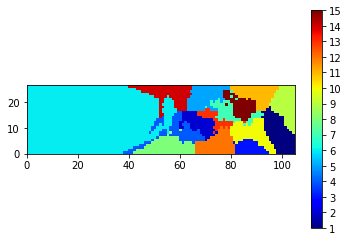

In [128]:
map_size = [105, 27]
x_resolution = map_size[0]
y_resolution = map_size[1]
data_plot = (df_dul_sort.values[:,3]).reshape(27, 105)
img = plt.imread("./pic/51_5F-3.png")
print(data_plot)

plt.imshow(img, zorder=0, extent=[0, map_size[0], 0, map_size[1]])
heatmap_rsrp = plt.pcolor(data_plot,cmap='jet',alpha=1)
plt.colorbar(ticks=range(16))

Draw learning curve
===

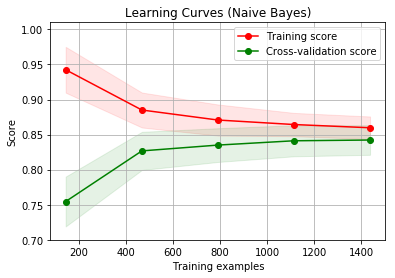

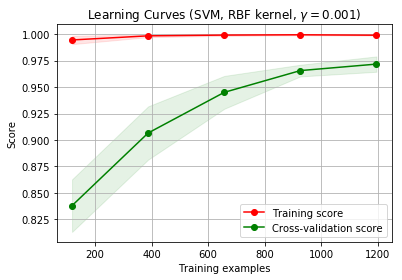

In [49]:
#def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
#                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
def plot_learning_curve(estimator, title, X, y, ylim=None,n_jobs=None, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = digits.data, digits.target
#print("X==",X[0:2])
#print("y==",y[:])
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y)

plt.show()


Get raw data rsrp and do rsrp training
===

In [57]:
#::train_part_test is raw data
print(train_part_test)
#::df_dul_sort is knn result for every point
print(df_dul_sort.values)

[[  49.         24.         38.        -85.338039    4.      ]
 [  50.         15.         38.        -79.72        9.      ]
 [  50.         20.         38.        -79.552593   12.      ]
 [  50.         17.         38.        -75.01063    12.      ]
 [  50.         13.         38.        -80.438722    9.      ]
 [  50.         18.         38.        -65.92554    12.      ]
 [  52.         18.         38.        -69.382677   12.      ]
 [  52.         24.         38.        -87.356126    4.      ]
 [  52.         12.         38.        -80.14        9.      ]
 [  52.         15.         38.        -78.771429    9.      ]
 [  52.         21.         38.        -83.96378    12.      ]
 [  52.         17.         38.        -72.331452   12.      ]
 [  54.         12.         38.        -79.185827    9.      ]
 [  54.         20.         38.        -78.621912   12.      ]
 [  54.         18.         38.        -77.214607   12.      ]
 [  54.         17.         38.        -75.864173   12.

Delete mutiple training result list
===

In [129]:
rmse_list=[]

In [130]:
os.remove('./zone_result/zone_predict_total.csv')
print("zone_predict_total has been Removed!")

zone_predict_total has been Removed!


Start Rsrp training
===

In [114]:
print(train_part_test)

[[  49.         24.         38.        -98.284298    6.      ]
 [  50.         15.         38.        -91.045       4.      ]
 [  50.         18.         38.        -85.764894    4.      ]
 [  50.         21.         38.        -94.336434    6.      ]
 [  50.         13.         39.        -89.753535    4.      ]
 [  50.         17.         38.        -85.795495    4.      ]
 [  52.         19.         38.        -84.307767    4.      ]
 [  52.         24.         38.       -101.438095    6.      ]
 [  52.         13.         39.        -87.716964    4.      ]
 [  52.         15.         39.        -96.723529    4.      ]
 [  52.         21.         38.        -96.656757    6.      ]
 [  52.         17.         38.        -90.020513    4.      ]
 [  54.         21.         38.        -93.928235    6.      ]
 [  54.         16.         38.        -90.312676    4.      ]
 [  54.         18.         38.        -94.347887    6.      ]
 [  54.         15.         38.        -91.526923    4.

In [115]:
print(df_dul_sort.values)

[[  0.   0.  38.   4.]
 [  1.   0.  38.   4.]
 [  2.   0.  38.   4.]
 ...
 [102.  26.  42.   7.]
 [103.  26.  42.   7.]
 [104.  26.  42.   7.]]


In [135]:
start = time.time()
for a in range(100):
    for i in range(1,16):
        print(i)
        zone = np.array([])
        zone = np.where(train_part_test[:,4] == i)
        #zone = np.where(X_sparse_total[:,7] == i)
        #print(train_part_test[zone[0],:])
        print("zone == ",zone[0])
        #X = train_part_test[zone[0],0:3]
        #y = train_part_test[zone[0],3]      
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
        #print(X_train)
        #model = KNeighborsRegressor(n_neighbors=3,weights='uniform')
        #model = DecisionTreeRegressor()
        #model = RandomForestRegressor()
        model = GradientBoostingRegressor()
        #model = MLPRegressor(solver='lbfgs', alpha=1e-5,
        #                         hidden_layer_sizes=(100,), random_state=1) 
        #model = SVR(kernel='linear', C=1e3)
        #scores = cross_val_score(model, X, y, cv=5)
        #print("scores == ",scores)
        #print("scores.mean() == ",scores.mean())
        model.fit(X_train, y_train)    
        #print(model)
        filename = 'finalized_model_' + str(i) +'-' + '.sav'
        pickle.dump(model, open(filename, 'wb'))
        y_pred = model.predict(X_test)
    
        #print(df_dul_sort.values[zone_allpoint[0],0:3])
        zone_allpoint = np.where(df_dul_sort.values[:,3] == i)
        print (len(df_dul_sort.values))
        #print (df_dul_sort.values)
        #print (zone_allpoint)
        #print(df_dul_sort.values[zone_allpoint[0],0:3])
        predict_zone = model.predict(df_dul_sort.values[zone_allpoint[0],0:3])
    #print(zone_allpoint[0]+1)
        print(len(predict_zone))
        print("weight == ",len(predict_zone)/len(df_dul_sort.values))
    #predict_zone_every = np.append(pci_result_zone[zone_allpoint[0],0:3],predict_zone)
        name = './zone_result/zone_predict_' + str(i) +'.csv'
        df_loc = pd.DataFrame(df_dul_sort.values[zone_allpoint[0],0:3],columns=['x','y','pci'])
        df_rsrp = pd.DataFrame(predict_zone,columns=['rsrp'])
        df_result = pd.concat([df_loc,df_rsrp],axis=1)
    #print(str(i)+"==="+"df==",df)
        df_result.to_csv(name,index=False,columns=['x','y','pci','rsrp'])
    #df_result = []
    
    #np.savetxt(name, predict_zone_every, delimiter=',', fmt='%f')
    #print("X_test",X_test)
    #print("y_pred",y_pred)
    #print("predict_zone",predict_zone)
    #print("[MSE]==",mean_squared_error(y_test, y_pred))
    #print("[RMSE]==",mean_squared_error(y_test, y_pred)**(0.5))
    #print("RMSE with weight result == ",(len(predict_zone)/len(df_dul_sort.values))*mean_squared_error(y_test, y_pred)**(0.5))
    
        rmse_list.extend((i,mean_squared_error(y_test, y_pred)**(0.5),(len(predict_zone)/len(df_dul_sort.values))*mean_squared_error(y_test, y_pred)**(0.5)))
        #print("rmse_list == ",rmse_list)
        rmse_np = np.array(rmse_list)
        rmse_reshape = np.reshape(rmse_np,(int(len(rmse_np)/3),3))
        #print("rmse_np == ",rmse_np)
        #print("rmse_reshape == ",rmse_reshape)
        loaded_model = pickle.load(open(filename, 'rb'))
rmse_reshape = np.around(rmse_reshape, decimals=2)
np.savetxt("./zone_result/rmse_reshape.csv",rmse_reshape, delimiter=',', fmt='%f')
rmse_reshape_pd = pd.DataFrame(rmse_reshape,columns=['zone','rmse','weight'])
#print("rmse_reshape_pd == ",rmse_reshape_pd)
rmse_reshape_pd_mean = rmse_reshape_pd.groupby('zone')['rmse','weight'].mean()
print("result == ",rmse_reshape_pd_mean)
print("rmse_reshape_pd_total == ",rmse_reshape_pd_mean['weight'].sum())
for i in range(1,16):
    zone_predict= np.genfromtxt('./zone_result/zone_predict_' + str(i) + '.csv', delimiter=',')    
    #print(zone_predict[1:,:])
    with open('./zone_result/zone_predict_total.csv','a') as f_handle:
        np.savetxt(f_handle,zone_predict[1:,:], delimiter=',', fmt='%f')
    #df.to_csv('./zone_result/zone_predict_total.csv', mode='a', encoding='utf-8', index=False,columns=['x','y','pci','rsrp'])
zone_predict_total_np = np.genfromtxt('./zone_result/zone_predict_total.csv', delimiter=',')  
zone_predict_total_pd = pd.DataFrame(zone_predict_total_np,columns=['x','y','pci','rsrp'])
end = time.time()
elapsed = end - start
print ("Time taken: ", elapsed, "seconds.")
#print(zone_predict_total_pd)
'''
df2 = pd.read_csv('./zone_result/zone_predict_2.csv')  
df3 = pd.read_csv('./zone_result/zone_predict_3.csv')  
df4 = pd.read_csv('./zone_result/zone_predict_4.csv')  
df5 = pd.read_csv('./zone_result/zone_predict_5.csv')
'''
#df6 = pd.read_csv('./zone_result/zone_predict_6.csv')  
#df7 = pd.read_csv('./zone_result/zone_predict_7.csv')
#df_merge_list = [df1,df2,df3,df4,df5]
#df_merge_result = pd.concat(df_merge_list)
#df_merge_result.to_csv('./zone_result/zone_predict_total_test.csv', encoding='utf-8', index=False,columns=['x','y','pci','rsrp'])
'''
    zone_allpoint = np.where(pci_result_zone[:,3] == i)
    #rint (zone_allpoint)
    print(pci_result_zone[zone_allpoint,0:3])
    predict_zone = loaded_model.predict(pci_result_zone[zone_allpoint,0:3])
    name = 'zone_predict_' + str(i) +'-' + '.csv'
    np.savetxt(name, predict_zone, delimiter=',', fmt='%f')
    result = loaded_model.score(X_test, y_test)
    #print("load result==",result)
'''

1
zone ==  [159 160 161 162 163 164 165 166 171]
2835
146
weight ==  0.051499118165784834
2
zone ==  [32 41 45 49 50 54 58 60 61 65 69 73]
2835
89
weight ==  0.03139329805996473
3
zone ==  [114 121 128 135 144]
2835
58
weight ==  0.020458553791887126
4
zone ==  [ 8 20 21 27 29 35 36 38 43 48 53 59]
2835
126
weight ==  0.044444444444444446
5
zone ==  [44 46 51 55 56 66 71 72 78]
2835
121
weight ==  0.04268077601410935
6
zone ==  [ 1  2  3  4  5 12 13 14 15 16 18 19]
2835
1360
weight ==  0.47971781305114636
7
zone ==  [ 62  79  82  86  87  88  89  96  97  98 103 109 132 139 141 152]
2835
80
weight ==  0.02821869488536155
8
zone ==  [22 23 24 28 33 40 42]
2835
122
weight ==  0.043033509700176366
9
zone ==  [167 168 169 170 172 173 174 175 176 177]
2835
117
weight ==  0.04126984126984127
10
zone ==  [106 110 111 112 113 119 120 127 133 134 140 145 146 150 153 154 156]
2835
122
weight ==  0.043033509700176366
11
zone ==  [117 126 136 137 147 148 149 151 155 157 158]
2835
113
weight ==  0.03

2835
89
weight ==  0.03139329805996473
3
zone ==  [114 121 128 135 144]
2835
58
weight ==  0.020458553791887126
4
zone ==  [ 8 20 21 27 29 35 36 38 43 48 53 59]
2835
126
weight ==  0.044444444444444446
5
zone ==  [44 46 51 55 56 66 71 72 78]
2835
121
weight ==  0.04268077601410935
6
zone ==  [ 1  2  3  4  5 12 13 14 15 16 18 19]
2835
1360
weight ==  0.47971781305114636
7
zone ==  [ 62  79  82  86  87  88  89  96  97  98 103 109 132 139 141 152]
2835
80
weight ==  0.02821869488536155
8
zone ==  [22 23 24 28 33 40 42]
2835
122
weight ==  0.043033509700176366
9
zone ==  [167 168 169 170 172 173 174 175 176 177]
2835
117
weight ==  0.04126984126984127
10
zone ==  [106 110 111 112 113 119 120 127 133 134 140 145 146 150 153 154 156]
2835
122
weight ==  0.043033509700176366
11
zone ==  [117 126 136 137 147 148 149 151 155 157 158]
2835
113
weight ==  0.039858906525573196
12
zone ==  [ 47  52  57  67  68  75  76  83  84  85  91  92  93  99 100 101 107]
2835
116
weight ==  0.04091710758377425


2835
146
weight ==  0.051499118165784834
2
zone ==  [32 41 45 49 50 54 58 60 61 65 69 73]
2835
89
weight ==  0.03139329805996473
3
zone ==  [114 121 128 135 144]
2835
58
weight ==  0.020458553791887126
4
zone ==  [ 8 20 21 27 29 35 36 38 43 48 53 59]
2835
126
weight ==  0.044444444444444446
5
zone ==  [44 46 51 55 56 66 71 72 78]
2835
121
weight ==  0.04268077601410935
6
zone ==  [ 1  2  3  4  5 12 13 14 15 16 18 19]
2835
1360
weight ==  0.47971781305114636
7
zone ==  [ 62  79  82  86  87  88  89  96  97  98 103 109 132 139 141 152]
2835
80
weight ==  0.02821869488536155
8
zone ==  [22 23 24 28 33 40 42]
2835
122
weight ==  0.043033509700176366
9
zone ==  [167 168 169 170 172 173 174 175 176 177]
2835
117
weight ==  0.04126984126984127
10
zone ==  [106 110 111 112 113 119 120 127 133 134 140 145 146 150 153 154 156]
2835
122
weight ==  0.043033509700176366
11
zone ==  [117 126 136 137 147 148 149 151 155 157 158]
2835
113
weight ==  0.039858906525573196
12
zone ==  [ 47  52  57  67  68

2835
116
weight ==  0.04091710758377425
13
zone ==  [ 63  64  70  74  77  80  81  90  95 105 125]
2835
48
weight ==  0.016931216931216932
14
zone ==  [ 0  6  7  9 10 11 17 25 26 30 31 34 37 39]
2835
133
weight ==  0.04691358024691358
15
zone ==  [ 94 102 104 108 115 116 118 122 123 124 129 130 131 138 142 143]
2835
84
weight ==  0.02962962962962963
1
zone ==  [159 160 161 162 163 164 165 166 171]
2835
146
weight ==  0.051499118165784834
2
zone ==  [32 41 45 49 50 54 58 60 61 65 69 73]
2835
89
weight ==  0.03139329805996473
3
zone ==  [114 121 128 135 144]
2835
58
weight ==  0.020458553791887126
4
zone ==  [ 8 20 21 27 29 35 36 38 43 48 53 59]
2835
126
weight ==  0.044444444444444446
5
zone ==  [44 46 51 55 56 66 71 72 78]
2835
121
weight ==  0.04268077601410935
6
zone ==  [ 1  2  3  4  5 12 13 14 15 16 18 19]
2835
1360
weight ==  0.47971781305114636
7
zone ==  [ 62  79  82  86  87  88  89  96  97  98 103 109 132 139 141 152]
2835
80
weight ==  0.02821869488536155
8
zone ==  [22 23 24 2

12
zone ==  [ 47  52  57  67  68  75  76  83  84  85  91  92  93  99 100 101 107]
2835
116
weight ==  0.04091710758377425
13
zone ==  [ 63  64  70  74  77  80  81  90  95 105 125]
2835
48
weight ==  0.016931216931216932
14
zone ==  [ 0  6  7  9 10 11 17 25 26 30 31 34 37 39]
2835
133
weight ==  0.04691358024691358
15
zone ==  [ 94 102 104 108 115 116 118 122 123 124 129 130 131 138 142 143]
2835
84
weight ==  0.02962962962962963
1
zone ==  [159 160 161 162 163 164 165 166 171]
2835
146
weight ==  0.051499118165784834
2
zone ==  [32 41 45 49 50 54 58 60 61 65 69 73]
2835
89
weight ==  0.03139329805996473
3
zone ==  [114 121 128 135 144]
2835
58
weight ==  0.020458553791887126
4
zone ==  [ 8 20 21 27 29 35 36 38 43 48 53 59]
2835
126
weight ==  0.044444444444444446
5
zone ==  [44 46 51 55 56 66 71 72 78]
2835
121
weight ==  0.04268077601410935
6
zone ==  [ 1  2  3  4  5 12 13 14 15 16 18 19]
2835
1360
weight ==  0.47971781305114636
7
zone ==  [ 62  79  82  86  87  88  89  96  97  98 103 

2835
122
weight ==  0.043033509700176366
9
zone ==  [167 168 169 170 172 173 174 175 176 177]
2835
117
weight ==  0.04126984126984127
10
zone ==  [106 110 111 112 113 119 120 127 133 134 140 145 146 150 153 154 156]
2835
122
weight ==  0.043033509700176366
11
zone ==  [117 126 136 137 147 148 149 151 155 157 158]
2835
113
weight ==  0.039858906525573196
12
zone ==  [ 47  52  57  67  68  75  76  83  84  85  91  92  93  99 100 101 107]
2835
116
weight ==  0.04091710758377425
13
zone ==  [ 63  64  70  74  77  80  81  90  95 105 125]
2835
48
weight ==  0.016931216931216932
14
zone ==  [ 0  6  7  9 10 11 17 25 26 30 31 34 37 39]
2835
133
weight ==  0.04691358024691358
15
zone ==  [ 94 102 104 108 115 116 118 122 123 124 129 130 131 138 142 143]
2835
84
weight ==  0.02962962962962963
1
zone ==  [159 160 161 162 163 164 165 166 171]
2835
146
weight ==  0.051499118165784834
2
zone ==  [32 41 45 49 50 54 58 60 61 65 69 73]
2835
89
weight ==  0.03139329805996473
3
zone ==  [114 121 128 135 144]


3
zone ==  [114 121 128 135 144]
2835
58
weight ==  0.020458553791887126
4
zone ==  [ 8 20 21 27 29 35 36 38 43 48 53 59]
2835
126
weight ==  0.044444444444444446
5
zone ==  [44 46 51 55 56 66 71 72 78]
2835
121
weight ==  0.04268077601410935
6
zone ==  [ 1  2  3  4  5 12 13 14 15 16 18 19]
2835
1360
weight ==  0.47971781305114636
7
zone ==  [ 62  79  82  86  87  88  89  96  97  98 103 109 132 139 141 152]
2835
80
weight ==  0.02821869488536155
8
zone ==  [22 23 24 28 33 40 42]
2835
122
weight ==  0.043033509700176366
9
zone ==  [167 168 169 170 172 173 174 175 176 177]
2835
117
weight ==  0.04126984126984127
10
zone ==  [106 110 111 112 113 119 120 127 133 134 140 145 146 150 153 154 156]
2835
122
weight ==  0.043033509700176366
11
zone ==  [117 126 136 137 147 148 149 151 155 157 158]
2835
113
weight ==  0.039858906525573196
12
zone ==  [ 47  52  57  67  68  75  76  83  84  85  91  92  93  99 100 101 107]
2835
116
weight ==  0.04091710758377425
13
zone ==  [ 63  64  70  74  77  80  8

4
zone ==  [ 8 20 21 27 29 35 36 38 43 48 53 59]
2835
126
weight ==  0.044444444444444446
5
zone ==  [44 46 51 55 56 66 71 72 78]
2835
121
weight ==  0.04268077601410935
6
zone ==  [ 1  2  3  4  5 12 13 14 15 16 18 19]
2835
1360
weight ==  0.47971781305114636
7
zone ==  [ 62  79  82  86  87  88  89  96  97  98 103 109 132 139 141 152]
2835
80
weight ==  0.02821869488536155
8
zone ==  [22 23 24 28 33 40 42]
2835
122
weight ==  0.043033509700176366
9
zone ==  [167 168 169 170 172 173 174 175 176 177]
2835
117
weight ==  0.04126984126984127
10
zone ==  [106 110 111 112 113 119 120 127 133 134 140 145 146 150 153 154 156]
2835
122
weight ==  0.043033509700176366
11
zone ==  [117 126 136 137 147 148 149 151 155 157 158]
2835
113
weight ==  0.039858906525573196
12
zone ==  [ 47  52  57  67  68  75  76  83  84  85  91  92  93  99 100 101 107]
2835
116
weight ==  0.04091710758377425
13
zone ==  [ 63  64  70  74  77  80  81  90  95 105 125]
2835
48
weight ==  0.016931216931216932
14
zone ==  [ 

2835
121
weight ==  0.04268077601410935
6
zone ==  [ 1  2  3  4  5 12 13 14 15 16 18 19]
2835
1360
weight ==  0.47971781305114636
7
zone ==  [ 62  79  82  86  87  88  89  96  97  98 103 109 132 139 141 152]
2835
80
weight ==  0.02821869488536155
8
zone ==  [22 23 24 28 33 40 42]
2835
122
weight ==  0.043033509700176366
9
zone ==  [167 168 169 170 172 173 174 175 176 177]
2835
117
weight ==  0.04126984126984127
10
zone ==  [106 110 111 112 113 119 120 127 133 134 140 145 146 150 153 154 156]
2835
122
weight ==  0.043033509700176366
11
zone ==  [117 126 136 137 147 148 149 151 155 157 158]
2835
113
weight ==  0.039858906525573196
12
zone ==  [ 47  52  57  67  68  75  76  83  84  85  91  92  93  99 100 101 107]
2835
116
weight ==  0.04091710758377425
13
zone ==  [ 63  64  70  74  77  80  81  90  95 105 125]
2835
48
weight ==  0.016931216931216932
14
zone ==  [ 0  6  7  9 10 11 17 25 26 30 31 34 37 39]
2835
133
weight ==  0.04691358024691358
15
zone ==  [ 94 102 104 108 115 116 118 122 123

7
zone ==  [ 62  79  82  86  87  88  89  96  97  98 103 109 132 139 141 152]
2835
80
weight ==  0.02821869488536155
8
zone ==  [22 23 24 28 33 40 42]
2835
122
weight ==  0.043033509700176366
9
zone ==  [167 168 169 170 172 173 174 175 176 177]
2835
117
weight ==  0.04126984126984127
10
zone ==  [106 110 111 112 113 119 120 127 133 134 140 145 146 150 153 154 156]
2835
122
weight ==  0.043033509700176366
11
zone ==  [117 126 136 137 147 148 149 151 155 157 158]
2835
113
weight ==  0.039858906525573196
12
zone ==  [ 47  52  57  67  68  75  76  83  84  85  91  92  93  99 100 101 107]
2835
116
weight ==  0.04091710758377425
13
zone ==  [ 63  64  70  74  77  80  81  90  95 105 125]
2835
48
weight ==  0.016931216931216932
14
zone ==  [ 0  6  7  9 10 11 17 25 26 30 31 34 37 39]
2835
133
weight ==  0.04691358024691358
15
zone ==  [ 94 102 104 108 115 116 118 122 123 124 129 130 131 138 142 143]
2835
84
weight ==  0.02962962962962963
1
zone ==  [159 160 161 162 163 164 165 166 171]
2835
146
wei

2835
58
weight ==  0.020458553791887126
4
zone ==  [ 8 20 21 27 29 35 36 38 43 48 53 59]
2835
126
weight ==  0.044444444444444446
5
zone ==  [44 46 51 55 56 66 71 72 78]
2835
121
weight ==  0.04268077601410935
6
zone ==  [ 1  2  3  4  5 12 13 14 15 16 18 19]
2835
1360
weight ==  0.47971781305114636
7
zone ==  [ 62  79  82  86  87  88  89  96  97  98 103 109 132 139 141 152]
2835
80
weight ==  0.02821869488536155
8
zone ==  [22 23 24 28 33 40 42]
2835
122
weight ==  0.043033509700176366
9
zone ==  [167 168 169 170 172 173 174 175 176 177]
2835
117
weight ==  0.04126984126984127
10
zone ==  [106 110 111 112 113 119 120 127 133 134 140 145 146 150 153 154 156]
2835
122
weight ==  0.043033509700176366
11
zone ==  [117 126 136 137 147 148 149 151 155 157 158]
2835
113
weight ==  0.039858906525573196
12
zone ==  [ 47  52  57  67  68  75  76  83  84  85  91  92  93  99 100 101 107]
2835
116
weight ==  0.04091710758377425
13
zone ==  [ 63  64  70  74  77  80  81  90  95 105 125]
2835
48
weight

15
zone ==  [ 94 102 104 108 115 116 118 122 123 124 129 130 131 138 142 143]
2835
84
weight ==  0.02962962962962963
1
zone ==  [159 160 161 162 163 164 165 166 171]
2835
146
weight ==  0.051499118165784834
2
zone ==  [32 41 45 49 50 54 58 60 61 65 69 73]
2835
89
weight ==  0.03139329805996473
3
zone ==  [114 121 128 135 144]
2835
58
weight ==  0.020458553791887126
4
zone ==  [ 8 20 21 27 29 35 36 38 43 48 53 59]
2835
126
weight ==  0.044444444444444446
5
zone ==  [44 46 51 55 56 66 71 72 78]
2835
121
weight ==  0.04268077601410935
6
zone ==  [ 1  2  3  4  5 12 13 14 15 16 18 19]
2835
1360
weight ==  0.47971781305114636
7
zone ==  [ 62  79  82  86  87  88  89  96  97  98 103 109 132 139 141 152]
2835
80
weight ==  0.02821869488536155
8
zone ==  [22 23 24 28 33 40 42]
2835
122
weight ==  0.043033509700176366
9
zone ==  [167 168 169 170 172 173 174 175 176 177]
2835
117
weight ==  0.04126984126984127
10
zone ==  [106 110 111 112 113 119 120 127 133 134 140 145 146 150 153 154 156]
2835
1

2835
84
weight ==  0.02962962962962963
1
zone ==  [159 160 161 162 163 164 165 166 171]
2835
146
weight ==  0.051499118165784834
2
zone ==  [32 41 45 49 50 54 58 60 61 65 69 73]
2835
89
weight ==  0.03139329805996473
3
zone ==  [114 121 128 135 144]
2835
58
weight ==  0.020458553791887126
4
zone ==  [ 8 20 21 27 29 35 36 38 43 48 53 59]
2835
126
weight ==  0.044444444444444446
5
zone ==  [44 46 51 55 56 66 71 72 78]
2835
121
weight ==  0.04268077601410935
6
zone ==  [ 1  2  3  4  5 12 13 14 15 16 18 19]
2835
1360
weight ==  0.47971781305114636
7
zone ==  [ 62  79  82  86  87  88  89  96  97  98 103 109 132 139 141 152]
2835
80
weight ==  0.02821869488536155
8
zone ==  [22 23 24 28 33 40 42]
2835
122
weight ==  0.043033509700176366
9
zone ==  [167 168 169 170 172 173 174 175 176 177]
2835
117
weight ==  0.04126984126984127
10
zone ==  [106 110 111 112 113 119 120 127 133 134 140 145 146 150 153 154 156]
2835
122
weight ==  0.043033509700176366
11
zone ==  [117 126 136 137 147 148 149 15

2835
89
weight ==  0.03139329805996473
3
zone ==  [114 121 128 135 144]
2835
58
weight ==  0.020458553791887126
4
zone ==  [ 8 20 21 27 29 35 36 38 43 48 53 59]
2835
126
weight ==  0.044444444444444446
5
zone ==  [44 46 51 55 56 66 71 72 78]
2835
121
weight ==  0.04268077601410935
6
zone ==  [ 1  2  3  4  5 12 13 14 15 16 18 19]
2835
1360
weight ==  0.47971781305114636
7
zone ==  [ 62  79  82  86  87  88  89  96  97  98 103 109 132 139 141 152]
2835
80
weight ==  0.02821869488536155
8
zone ==  [22 23 24 28 33 40 42]
2835
122
weight ==  0.043033509700176366
9
zone ==  [167 168 169 170 172 173 174 175 176 177]
2835
117
weight ==  0.04126984126984127
10
zone ==  [106 110 111 112 113 119 120 127 133 134 140 145 146 150 153 154 156]
2835
122
weight ==  0.043033509700176366
11
zone ==  [117 126 136 137 147 148 149 151 155 157 158]
2835
113
weight ==  0.039858906525573196
12
zone ==  [ 47  52  57  67  68  75  76  83  84  85  91  92  93  99 100 101 107]
2835
116
weight ==  0.04091710758377425


13
zone ==  [ 63  64  70  74  77  80  81  90  95 105 125]
2835
48
weight ==  0.016931216931216932
14
zone ==  [ 0  6  7  9 10 11 17 25 26 30 31 34 37 39]
2835
133
weight ==  0.04691358024691358
15
zone ==  [ 94 102 104 108 115 116 118 122 123 124 129 130 131 138 142 143]
2835
84
weight ==  0.02962962962962963
1
zone ==  [159 160 161 162 163 164 165 166 171]
2835
146
weight ==  0.051499118165784834
2
zone ==  [32 41 45 49 50 54 58 60 61 65 69 73]
2835
89
weight ==  0.03139329805996473
3
zone ==  [114 121 128 135 144]
2835
58
weight ==  0.020458553791887126
4
zone ==  [ 8 20 21 27 29 35 36 38 43 48 53 59]
2835
126
weight ==  0.044444444444444446
5
zone ==  [44 46 51 55 56 66 71 72 78]
2835
121
weight ==  0.04268077601410935
6
zone ==  [ 1  2  3  4  5 12 13 14 15 16 18 19]
2835
1360
weight ==  0.47971781305114636
7
zone ==  [ 62  79  82  86  87  88  89  96  97  98 103 109 132 139 141 152]
2835
80
weight ==  0.02821869488536155
8
zone ==  [22 23 24 28 33 40 42]
2835
122
weight ==  0.043033

2835
48
weight ==  0.016931216931216932
14
zone ==  [ 0  6  7  9 10 11 17 25 26 30 31 34 37 39]
2835
133
weight ==  0.04691358024691358
15
zone ==  [ 94 102 104 108 115 116 118 122 123 124 129 130 131 138 142 143]
2835
84
weight ==  0.02962962962962963
1
zone ==  [159 160 161 162 163 164 165 166 171]
2835
146
weight ==  0.051499118165784834
2
zone ==  [32 41 45 49 50 54 58 60 61 65 69 73]
2835
89
weight ==  0.03139329805996473
3
zone ==  [114 121 128 135 144]
2835
58
weight ==  0.020458553791887126
4
zone ==  [ 8 20 21 27 29 35 36 38 43 48 53 59]
2835
126
weight ==  0.044444444444444446
5
zone ==  [44 46 51 55 56 66 71 72 78]
2835
121
weight ==  0.04268077601410935
6
zone ==  [ 1  2  3  4  5 12 13 14 15 16 18 19]
2835
1360
weight ==  0.47971781305114636
7
zone ==  [ 62  79  82  86  87  88  89  96  97  98 103 109 132 139 141 152]
2835
80
weight ==  0.02821869488536155
8
zone ==  [22 23 24 28 33 40 42]
2835
122
weight ==  0.043033509700176366
9
zone ==  [167 168 169 170 172 173 174 175 1

2835
48
weight ==  0.016931216931216932
14
zone ==  [ 0  6  7  9 10 11 17 25 26 30 31 34 37 39]
2835
133
weight ==  0.04691358024691358
15
zone ==  [ 94 102 104 108 115 116 118 122 123 124 129 130 131 138 142 143]
2835
84
weight ==  0.02962962962962963
1
zone ==  [159 160 161 162 163 164 165 166 171]
2835
146
weight ==  0.051499118165784834
2
zone ==  [32 41 45 49 50 54 58 60 61 65 69 73]
2835
89
weight ==  0.03139329805996473
3
zone ==  [114 121 128 135 144]
2835
58
weight ==  0.020458553791887126
4
zone ==  [ 8 20 21 27 29 35 36 38 43 48 53 59]
2835
126
weight ==  0.044444444444444446
5
zone ==  [44 46 51 55 56 66 71 72 78]
2835
121
weight ==  0.04268077601410935
6
zone ==  [ 1  2  3  4  5 12 13 14 15 16 18 19]
2835
1360
weight ==  0.47971781305114636
7
zone ==  [ 62  79  82  86  87  88  89  96  97  98 103 109 132 139 141 152]
2835
80
weight ==  0.02821869488536155
8
zone ==  [22 23 24 28 33 40 42]
2835
122
weight ==  0.043033509700176366
9
zone ==  [167 168 169 170 172 173 174 175 1

'\n    zone_allpoint = np.where(pci_result_zone[:,3] == i)\n    #rint (zone_allpoint)\n    print(pci_result_zone[zone_allpoint,0:3])\n    predict_zone = loaded_model.predict(pci_result_zone[zone_allpoint,0:3])\n    name = \'zone_predict_\' + str(i) +\'-\' + \'.csv\'\n    np.savetxt(name, predict_zone, delimiter=\',\', fmt=\'%f\')\n    result = loaded_model.score(X_test, y_test)\n    #print("load result==",result)\n'

Plot rsrp map
===

In [ ]:
#df_total = pd.read_csv('./zone_result/zone_predict_total.csv')  
#print(df_total)
df_total_sort = zone_predict_total_pd.sort_values(by=['y','x'])
#print (df_total_sort)
rsrp_map_frompd = df_total_sort.values
print (rsrp_map_frompd)
np.savetxt('./result_rsrp/rsrp_map_frompd.csv', rsrp_map_frompd, delimiter=',', fmt='%f')
for i in range(len(rsrp_map_frompd)):
    if rsrp_map_frompd[i,3]>=-60:
        rsrp_map_frompd[i,3] = -60
    if rsrp_map_frompd[i,3]<=-130:
        rsrp_map_frompd[i,3] = -130
print (rsrp_map_frompd)
print (len(rsrp_map_frompd))
rsrp_map_pd = (rsrp_map_frompd[:,3]).reshape(27, 105)
img = plt.imread("./pic/51_5F-3.png")
plt.imshow(img, zorder=0, extent=[0, map_size[0], 0, map_size[1]])
heatmap_rsrp = plt.pcolor(rsrp_map_pd,cmap='jet',alpha=1)
plt.savefig('./result_rsrp/rsrp_map.png')
plt.colorbar()


Merge to 51-5F map
===

In [97]:
#bk = Image.open('5f_map.png')
bk = Image.open('./pic/823.PNG')
print (bk.size)
heatmap_rsrp = Image.open('./result_rsrp/rsrp_map.png')
print (heatmap_rsrp.size)
#heatmap_rsrp = heatmap_rsrp.resize((501, 130))
bk = bk.resize((432, 288))
heatmap_rsrp = heatmap_rsrp.resize((432, 288))
#bk = bk.resize((640, 480))
blended = Image.blend(heatmap_rsrp, bk, alpha=0.1)
blended.save('./result_rsrp/zone_rsrp.png')

(623, 411)
(640, 480)


In [ ]:
###choice K    
'''    for K in range(25):
        K_value = K+1
        model = KNeighborsRegressor(n_neighbors = K_value, weights='uniform', algorithm='auto')
        model.fit(X_train, y_train) 
        y_pred = model.predict(X_test)
        accuracy = model.score(X_test, y_test)
        print ("k==",K,"Accuracy is == ", accuracy)
'''
###choice K 

In [132]:
start = time.time()
end = time.time()
elapsed = end - start
print ("Time taken: ", elapsed, "seconds.")

Time taken:  2.0503997802734375e-05 seconds.


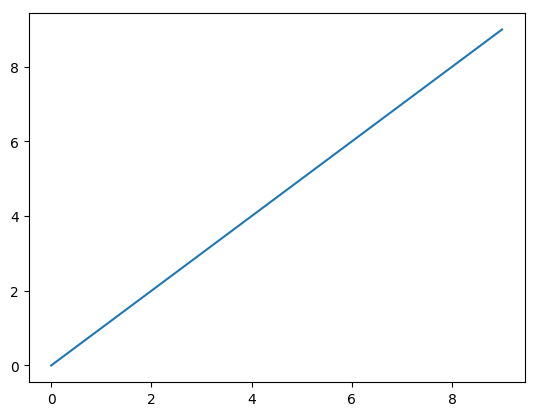

In [83]:

#plt.rcParams.update(plt.rcParamsDefault)
#inline_rc = dict(plt.rcParams)

#plt.plot(range(10))


In [104]:
#bk = Image.open('5f_map.png')
bk = Image.open('./pic/823.PNG')
print (bk.size)
heatmap_rsrp = Image.open('./pic/1.png')
print (heatmap_rsrp.size)
#heatmap_rsrp = heatmap_rsrp.resize((501, 130))
#bk = bk.resize((432, 288))
heatmap_rsrp = heatmap_rsrp.resize((623, 411))
#bk = bk.resize((640, 480))
blended = Image.blend(heatmap_rsrp, bk, alpha=0.1)
blended.save('raw.png')

(623, 411)
(614, 265)


Back code
===

In [ ]:
#title = "Learning Curves (KNN)"
    #plot_learning_curve(model, title, X, y, ylim=(0.1, 1.01))
    #plt.show()
    #train_scores, valid_scores = validation_curve(Ridge(), X_train, y_train, "alpha",
    #                                              np.logspace(-7, 3, 3))
    #print("train_scores==",train_scores)
    #print("valid_scores==",valid_scores)
    #train_scores_mean = np.mean(train_scores, axis=1)
    #valid_scores_mean = np.mean(valid_scores, axis=1)
    #print("train_scores_mean==",train_scores_mean)
    #print("valid_scores_mean==",valid_scores_mean)
    #train_sizes, train_scores, valid_scores = learning_curve(model, X, y,train_sizes=np.linspace(.1, 1.0, 5), cv=5)
    #print("train_scores==",train_scores)
    #print("valid_scores==",valid_scores)
    #plot_learning_curve(model, title, X, y, ylim=(0.1, 1.01),cv=cv)
    #(a,b)=X.shape
    #print(a)
    #print(b)
    #plot_learning_curve(model, title, X, y)
    #plt.show()
    #scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    #print(scores)
    #print(scores.mean())
    '''
    if i==4:
        print("4")
        model = KNeighborsRegressor(n_neighbors=3,weights='distance')
    #model = MLPRegressor(solver='lbfgs', alpha=1e-5,
    #                     hidden_layer_sizes=(30,), random_state=1) 
    #model = KNeighborsRegressor(n_neighbors=3)
        model.fit(X_train, y_train)
    elif i==3:
        print("3")
        model = MLPRegressor(solver='lbfgs', alpha=1e-5,
                             hidden_layer_sizes=(30,), random_state=1) 
        model.fit(X_train, y_train)
    else:
        model = KNeighborsRegressor(n_neighbors=3,weights='distance')
        model.fit(X_train, y_train)
    '''

In [219]:
from sklearn.decomposition import DictionaryLearning
X = train_part_test[:,0:3]
y = train_part_test[:,3]
#print(X)
#print(y)
dct=DictionaryLearning(n_components=5)
dct.fit(X)
X_sparse = dct.transform(X)
print('components is:\n',dct.components_)
#print('after transform:\n',dct.transform(X))
print(type(X_sparse))
print(X_sparse)

components is:
 [[-0.86653434 -0.16985973 -0.46932494]
 [ 0.74830313  0.34251501  0.56808969]
 [-0.9089061  -0.20697463 -0.36200996]
 [-0.80365187 -0.02079332 -0.59473634]
 [ 0.9098468   0.03379493  0.41356585]]
<class 'numpy.ndarray'>
[[ -78.39979061    0.            0.            0.            0.        ]
 [ -94.22214839    0.            0.            0.            0.        ]
 [ -93.7125692     0.            0.            0.            0.        ]
 [ -79.79313983    0.            0.            0.            0.        ]
 [ -95.08868274    0.            0.            0.            0.        ]
 [ -94.56186785    0.            0.            0.            0.        ]
 [ -90.24643182    0.            0.            0.            0.        ]
 [   0.            0.         -111.63838346    0.            0.        ]
 [ -94.57910354    0.            0.            0.            0.        ]
 [ -76.66672192    0.            0.            0.            0.        ]
 [ -91.97950051    0.            0

In [220]:
#print(train_part_test)
train_part_test_del = np.delete(train_part_test, 0, axis=1)
train_part_test_del = np.delete(train_part_test_del, 0, axis=1)
#print(train_part_test_del)
X_sparse_total = np.concatenate((X_sparse,train_part_test_del), axis=1)
#print(X_sparse_total)
np.savetxt("./zone_result/X_sparse_total.csv",X_sparse_total, delimiter=',', fmt='%f')